In [1]:
# hacemos la importacion de todo loq ue vamos a utilizar en el analicis y ejecucion de este proyecto. 

import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#cargamos los datos 
dataset = pd.read_csv('MarathonData.csv')

In [3]:
#visualizamos los datos 
dataset.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [4]:
#cargamos
dataset["Name"]

0         Blair MORGAN
1        Robert Heczko
2        Michon Jerome
3        Daniel Or lek
4         Luk ? Mr zek
            ...       
82    Stefano Vegliani
83      Andrej Madliak
84          Yoi Ohsako
85          Simon Dunn
86         Pavel ?imek
Name: Name, Length: 87, dtype: object

In [5]:
# hacemos una validacion de los datos verificando , numero de columnas , datos no nulos, y el tipo de 
#datos que  vamos a manipular 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [6]:
#usamos este comando con el fin de convertir los datos que no se han cargado bien en tipo numerico , lo haga ahora 
#como por ejemplo los que aparecen como "object" 
dataset['Wall21'] = pd.to_numeric(dataset['Wall21'],errors='coerce')


In [7]:
#urilizamos describe , para hacer un analicis mas estadistico de los datos 
dataset.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

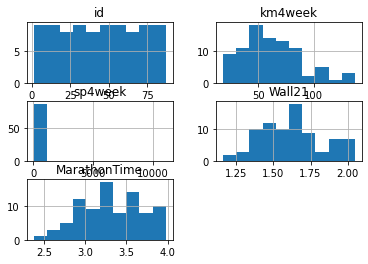

In [8]:
# aqui podemos ver los datos de manera grafica para tener una persepcion distinta de los mismos 
dataset.hist()

In [10]:
#hacemos un barrido de los datos que no son necesarios para nuestro modelo de preddicion 
dataset = dataset.drop(columns=['Name'])
dataset = dataset.drop(columns=['id'])
dataset = dataset.drop(columns=['Marathon'])
dataset = dataset.drop(columns=['CATEGORY'])
dataset

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [11]:
#verificacion de falta de daos con esta entrada podemos ver si en alguna de mis columnas hace falta datos 
dataset.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [12]:
# a la columna que nos muestra falta de datos realizamos un proceso de ingreso de datos en 0 para, 
# de esta manera poder rellenar los datos faltantes en la tabla per con un valor que no afecte la misma. 
dataset["CrossTraining"] = dataset["CrossTraining"].fillna(0)
dataset

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [13]:
#aqui realizamos la eliminacion de 6 filas para tener lito los datos correspondiente a el modelo. 
dataset = dataset.dropna(how='any')
dataset

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [15]:
# aui podemos verificar en mi columna cuantos datos tengo que no son numericos y a continuacion realizo
#su modificacion. 
dataset['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [16]:
valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
dataset.replace(valores_cross, inplace=True)
dataset

C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [17]:
dataset['CrossTraining'].unique()

array([0, 1, 3, 5, 2, 4], dtype=int64)

In [18]:
dataset['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [20]:
valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
dataset.replace(valores_categoria, inplace=True)
dataset

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


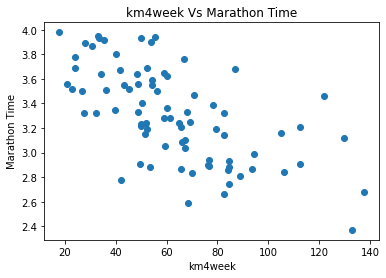

In [21]:
#verificamos agunas tendencias que se dan relcionando el timpo de maraton con la velocidad de los corredores 
plt.scatter(x = dataset['km4week'], y=dataset['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

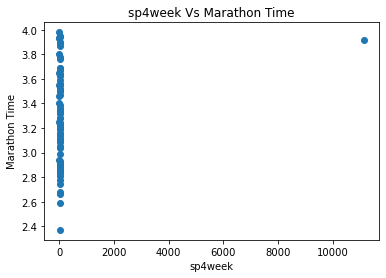

In [23]:
plt.scatter(x = dataset['sp4week'], y=dataset['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [24]:
# eliminamos el datos que nos genera un poco de deserden en en analicis para asi repetir la entrada 
dataset = dataset.query('sp4week<1000')

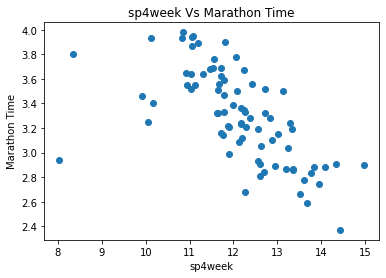

In [25]:
plt.scatter(x = dataset['sp4week'], y=dataset['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

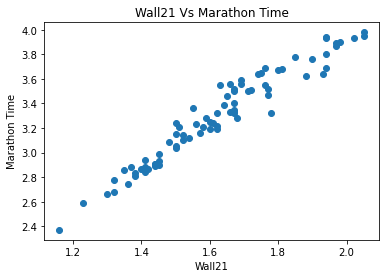

In [26]:
plt.scatter(x = dataset['Wall21'], y=dataset['MarathonTime'])
plt.title('Wall21 Vs Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

In [27]:
# entramos a fase de entrenamiento de mi modelo.

dataset

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [29]:
#dividimos lo datos en un 80%y un 20 % 
datos_entrenamiento = dataset.sample(frac=0.8,random_state=0)
datos_test = dataset.drop(datos_entrenamiento.index)

In [30]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [31]:
datos_test

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
9,2,84.2,13.365079,0,1.35,2.86
12,2,53.5,14.078947,3,1.37,2.88
21,3,67.3,13.239344,0,1.50,3.04
26,6,129.6,12.188088,0,1.54,3.12
38,1,64.7,13.294521,0,1.50,3.24
39,6,69.2,10.053269,0,1.60,3.25
41,5,58.8,12.829091,0,1.68,3.28
46,6,48.6,12.252101,0,1.66,3.33
48,2,60.1,12.182432,0,1.55,3.36
49,1,78.2,12.000000,0,1.64,3.39


In [32]:
# hacemos una separacion de las tablas. 
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [33]:
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [34]:
etiquetas_test

9     2.86
12    2.88
21    3.04
26    3.12
38    3.24
39    3.25
41    3.28
46    3.33
48    3.36
49    3.39
62    3.56
68    3.65
69    3.67
71    3.69
75    3.78
83    3.93
Name: MarathonTime, dtype: float64

In [35]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


In [37]:
#modelo de regresion lineal 
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [38]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

In [39]:
# porcentaje de error en mis predicciones 
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 11.030345


In [40]:
#hacemos pruebas del modelo con datos inventados para ver su prediccion de tiempo de maraton. 
nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [76]:
modelo.predict(nuevo_corredor)


array([2.199872])